$$H_0: a = 0 => CV(a = 0) \sim \chi^2_{T - 1}$$

$$H_1: a = \hat{a}$$

\begin{align*}
    LL_0 - LL_{LOOCV} 
    &= LL_0 - \sum_{t=2}^T\left(X_t - \hat{a}^{(-t)}X_{t-1}\right)^2 \\ 
    &= LL_0 - \sum_{t=2}^T\left(X_t - \left(\hat{a} - \hat{a} - \hat{a}^{(-t)}\right)X_{t-1}\right)^2 \\ 
    &= LL_0 - \sum_{t=2}^T\left(X_t - \hat{a}X_{t-1} - \left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right)^2 \\ 
    &= LL_0 - \sum_{t=2}^T\Big(\left(X_t - \hat{a}X_{t-1}\right)^2 \\  &\qquad\qquad\ \ -2\left(X_t - \hat{a}X_{t-1}\right)\left(\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right) \\
    &\qquad\qquad\ \ + \left(\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right)^2\Big)\\ &= LL_0 - LL_1 + C_t,
\end{align*}

We see that $$-2\sum_{t=2}^T\left(X_t - \hat{a}X_{t-1}\right)\left(\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right) + \sum_{t=2}^T\left(\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right)^2$$ is the quantity of interest. Interestingly, the second part, $$\sum_{t=2}^T\left(\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right)^2,$$ is almost neglible, so we conjecture that this converges to zero much faster. So let us consider $$-2 \sum_{t=2}^T\left(X_t - \hat{a}X_{t-1}\right)\left(\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}\right) = -2 \sum_{t=2}^T\left(a - \hat{a}\right)\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}^2 - 2\varepsilon_t \left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}.$$
Here, the first part $$-2 \sum_{t=2}^T\left(a - \hat{a}\right)\left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}^2$$ is almost neglible, so we only need to focus on the second part, $$-2 \sum_{t=2}^T\varepsilon_t \left(\hat{a}^{(-t)} - \hat{a}\right)X_{t-1}.$$
We can sort of say that the within one sum, the independence is almost neglible. The LOOCV estimate does not depend on $X_{t-1}$. The MLE estimator, in the limit for $T$ large, barely depends on $X_{t-1}$.

Strangely enough, the sum seems to converge to a normal distribution with mean $-2$ and covariance $25 / T$. Therefore, as $T$ gets large, this will converge to $2$.

Let us investigate the relation between $\varepsilon_t$, $X_{t-1}$, and $\left(\hat{a} - \hat{a}^{(-t)}\right)$. If $\varepsilon_t < 0$, then not using this pair $(X_t, X_{t+1})$ will increase the value of $\hat{a}$, so $$X_{t-1} > 0 \text{ and } \varepsilon_t > 0 \iff \hat{a} < \hat{a}^{(-t)}.$$
So, we see that almost surely, each part of the sum is negative.

We see that $$\left(\hat{a}^{(-t)} - \hat{a}\right)$$ has mean of zero and variance of approximately $1 / T$. Then, summing over $T$ would yield $1$!

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy.special import kv

In [2]:
import numpy as np
from tqdm import tqdm

In [3]:
a, b, T = 0, 0, 100

In [3]:
def gen_ar(a, T, s = 1):
    X = np.zeros(T)
    
    noises = np.append(np.random.normal(a, np.sqrt(s / (1 - a ** 2))), np.random.normal(0, np.sqrt(s), T - 1))
    
    # generate AR(1)
    X[0] = noises[0]
    
    for t in range(1, T):
        X[t] = a * X[t - 1] + noises[t]
        
    return X, noises

In [211]:
cv_0 = []
cv_MLE = []
cv_LOOCV_one = []
cv_LOOCV_two = []
cv_MLE_LOOCV_diff = []

cv_MLE_LOOCV_diff_1 = []
cv_MLE_LOOCV_diff_2 = []

cv_diff_1 = []
cv_diff_2 = []

cv_diff_11 = []
cv_diff_12 = []

cv_diff_121 = []
cv_diff_122 = []
cv_diff_123 = []

a_MLE_list = np.array([])
a_LOOCV_one_list = np.array([])
a_LOOCV_two_list = np.array([])

sum_lst = []
iters = 100000
a, T = 0.5, 10000
for _ in tqdm(range(iters)):
    
    ## Generate Data
    X, noises = gen_ar(a, T)
    a_est = np.zeros(T)
    
    ## CV-0: Use the true value for a
    # cv_0.append(1 / (T - 2) * np.linalg.norm(X[2:] - a * X[1:-1], 2) ** 2)
    
    ## CV-01: Use the MLE value for a
    a_MLE = (np.dot(X[:-1], X[1:])) / (np.dot(X[:-1], X[:-1]))
    # cv_MLE.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_MLE * X[1:-1], 2) ** 2)
#     a_MLE_list = np.append(a_MLE_list, a_MLE)
    
    ## CV-1: Use the LOOCV-one for a
    a_LOOCV_one = (np.dot(X[:-1], X[1:]) - X[1:-1] * X[2:]) / (np.dot(X[:-1], X[:-1]) - X[1:-1] * X[1:-1])
#     a_LOOCV_one_list = np.append(a_LOOCV_one_list, np.mean(a_LOOCV_one))
    # cv_LOOCV_one.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2)
    
    ## CV-2: Use the LOOCV-two for a
    # a_LOOCV_two = (np.dot(X[:-1], X[1:]) - X[:-2] * X[1:-1] - X[1:-1] * X[2:]) / (np.dot(X[:-1], X[:-1]) - X[:-2] * X[:-2] - X[1:-1] * X[1:-1])
#     a_LOOCV_two_list = np.append(a_LOOCV_two_list, np.mean(a_LOOCV_two))
#     cv_LOOCV_two.append(1 / (T - 2) * np.linalg.norm(X[2:] - a_LOOCV_two * X[1:-1], 2) ** 2)
    
    # print(((-2 * (X[2:] - a_MLE * X[1:-1]) * (a_LOOCV_one - a_MLE) * X[1:-1]) + (((a_LOOCV_one - a_MLE) * X[1:-1]) ** 2)).sum())
    # print((-2 * (X[2:] - a_MLE * X[1:-1]) * (a_LOOCV_one - a_MLE) * X[1:-1]).sum(), (((a_LOOCV_one - a_MLE) * X[1:-1]) ** 2).sum())
    
#     cv_diff_1.append((-2 * (X[2:] - a_MLE * X[1:-1]) * (a_LOOCV_one - a_MLE) * X[1:-1]).sum())
#     cv_diff_2.append((((a_LOOCV_one - a_MLE) * X[1:-1]) ** 2).sum())
    
#     cv_diff_11.append(-2 * ((a - a_MLE) * (a_LOOCV_one - a_MLE) * X[1:-1] ** 2).sum())
    cv_diff_12.append(-2 * (noises[2:] * (a_LOOCV_one - a_MLE) * X[1:-1]).sum())
    
#     cv_diff121.append(noises[2:])
#     cv_MLE_LOOCV_diff.append(np.linalg.norm(X[2:] - a_MLE * X[1:-1], 2) ** 2 - np.linalg.norm(X[2:] - a_LOOCV_one * X[1:-1], 2) ** 2)
    # print(cv_MLE_LOOCV_diff[-1])
    # cv_MLE_LOOCV_diff.append(1 / (T - 2) * (-2 * a_MLE * X[1:-1] * X[2:] + 2 * a_LOOCV_one * X[1:-1] * X[2:]).sum())
    # cv_MLE_LOOCV_diff.append((-2 * (a_MLE - a_LOOCV_one) * X[1:-1] * noises[2:]).sum())
#     cv_MLE_LOOCV_diff_1.append((-2 * (a_MLE - a_LOOCV_one) * (a * noises[:-2] + noises[1:-1]) * noises[2:]).sum())
#     # cv_MLE_LOOCV_diff_1.append((a_MLE * X[1:-1] * noises[2:]).sum())
#     # cv_MLE_LOOCV_diff_2.append((a_LOOCV_one * X[1:-1] * noises[2:]).sum())
    
    # sum_lst.append(-2 * (a_MLE - a_LOOCV_one) * (a * noises[:-2] + noises[1:-1]) * noises[2:])

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [17:41<00:00, 94.24it/s]


In [107]:
print(sum(cv_diff_12[1]))
print(sum(cv_diff_12[0][cv_diff_12[0] < 0.001]))
print(sum(cv_diff_12[0][cv_diff_12[0] < 0.000001]))

# from scipy.stats import chi2

# x = np.arange(min(cv_diff_12[0]), max(cv_diff_12[0]), (max(cv_diff_12[0]) - min(cv_diff_12[0])) / 1000)

# plt.plot(x, chi2.pdf(x, df = 1) * 25)
# plt.hist(cv_diff_12[0], bins = 1000, density = True);

1.9820947961672317
0.9873687104932224
0.000434140169408962


In [57]:
print(cv_diff_11)
print(len(cv_diff_12[0]))
print(len(np.array(cv_diff_12[0])[np.array(cv_diff_12[0]) > 0]))

# print(np.array(cv_diff_11) + np.array(cv_diff_12))
# print(cv_diff_1)

[]
99998
99943


In [54]:
print(cv_diff_1)
print(cv_diff_2)

print(np.array(cv_diff_1) + np.array(cv_diff_2))
print(cv_MLE_LOOCV_diff)

[1.9488457780433093]
[0.0002783295412986823]
[1.94912411]
[]


In [234]:
def g(a):
    return np.log(a ** 2)
    return np.linalg.norm(X[1:] - a * X[:-1], 2) ** 2

def der_g(a):
    return 2 / a
    return -np.dot(X[1:] - a * X[:-1], X[:-1])

np.array([g(a) for a in a_list])

array([-1.40951292, -1.33456974, -1.38189928, ..., -1.45606098,
       -1.39783005, -1.34818694])

In [213]:
print(np.cov(to_hist / 2))
print(np.std(to_hist / 2))
print(np.sqrt(6) / np.sqrt(T))
print(6 / T)

0.0005995749036247377
0.024486096215519972
0.02449489742783178
0.0006


In [45]:
print(np.std(cv_diff) * 2 * np.sqrt(T))

9.58933076069249


In [87]:
print(np.cov(np.sqrt(T) * a_diff))
print(np.std(a_diff))
print(4 / ((T)))

6.283934545215489e-11
1.5850291901699828e-07
0.001599360255897641


In [23]:
print(cv_MLE_LOOCV_diff[:10])
print((np.array(cv_MLE) - np.array(cv_LOOCV_one))[:10])

print(np.shape(cv_MLE_LOOCV_diff))

[-0.018966987683951744, -0.020271792099465218, -0.02747857200369867, -0.012520185472913165, -0.01779382504731234, -0.01836637486508531, -0.01572576265919747, -0.017032648611657295, -0.02835335343671159, -0.020725189776351436]
[-0.01905291 -0.02108088 -0.02910635 -0.01309799 -0.01885006 -0.01871313
 -0.01569276 -0.01757424 -0.02989732 -0.02094603]
(1000,)


In [399]:
print(np.shape(np.array(sum_lst[0])))

(4999,)


In [463]:
print(sum(sum_lst[0][T // 10:]))

-1.8051875608237848


1.9994353255611503


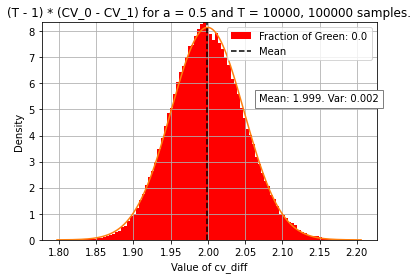

In [212]:
# cv_diff = (T - 2) * (np.array(cv_0) - np.array(cv_LOOCV_one))
# cv_diff = np.array(cv_MLE_LOOCV_diff) # - np.array(cv_MLE_LOOCV_diff_2)
# cv_diff = np.array(cv_MLE) - np.array(cv_LOOCV_one)
# cv_diff = np.array(cv_MLE_LOOCV_diff)

# a_diff = (np.array(a_MLE_list) - np.array(a_LOOCV_one_list))
# print(len(cv_diff[cv_diff < 0]) / len(cv_diff))

to_hist = np.array((cv_diff_12))
# to_hist = np.sqrt((T - 1)) * (g(a) - np.array([g(a) for a in a_list]))
# to_hist = np.array(cv_diff)

f = plt.figure()
ax = f.add_subplot(111)

plt.title(f"(T - 1) * (CV_0 - CV_1) for a = {a} and T = {T}, {iters} samples.")
plt.xlabel(r"Value of cv_diff")

# print(np.mean(to_hist))
# print(np.cov(to_hist))
# print(len(to_hist[to_hist > 0]) / len(to_hist))
# plt.hist(n_list, bins = 100, density = True);

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(min(to_hist), max(to_hist), (max(to_hist) - min(to_hist)) / 1000)

print(np.mean(np.abs(to_hist)))

# the histogram of the data


n, bins, patches = ax.hist(to_hist, 100, density=True, alpha=1.00, facecolor = 'g', label = f"Fraction of Green: {sum(to_hist <= 0) / len(to_hist)}")

for b, p in zip(bins, patches):
    if b > 0:
        p.set_facecolor("red")

max_height = max([r.get_height() for r in patches])

plt.ylim(0, max_height + 0.001)
a_T = ((T - (a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2))) / (1 - a ** 2)) / (T)
plt.ylabel('Density')
t = plt.text(0.65, 0.65, f'Mean: {round(to_hist.mean(), 3)}. Var: {round(to_hist.var(), 3)}', ha='left', va='center', transform=ax.transAxes)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor = 'grey'))
plt.grid(True)
plt.vlines(np.mean(to_hist), 0, max_height, linestyle = '--', color = 'black', label = "Mean")
# plt.plot(x, norm.pdf(x, loc = 1, scale = np.sqrt(2 / (T - 1))), label = r"$\mathcal{N}(0, 2 / (T - 1))$")
# plt.plot(x, norm.pdf(x, loc = 2, scale = np.sqrt(1 / (2 * np.sqrt(T)))))
# plt.plot(x, norm.pdf(x, loc = 0, scale = np.sqrt(4 / (T))))
plt.plot(x, norm.pdf(x, loc = to_hist.mean(), scale = np.std(to_hist)))

# plt.plot(x, chi2.pdf((x + 2), df = 1), label = r"$\chi_1^2 - 2$")
# plt.plot(x, chi2.pdf(x, df = 1), label = r"$\chi_1^2 - 2$")
# plt.plot(x, chi2.pdf(x , df = 1), label = r"$\chi_1^2 - 2$")
# print(kv(0, x[x > 0] / max(x[x > 0])))
# print(x[x > 0] / max(x[x > 0]))
# plt.plot(x[x > 0],  kv(0, (x[x > 0] / (max(0.4 * x[x > 0])))) * 500, color = 'black')
# plt.plot(-x,  kv(0, x) / 3.14)

plt.legend()


# plt.plot(x, norm.pdf(x, loc = 1, scale = np.sqrt(2 / (T - 1))))

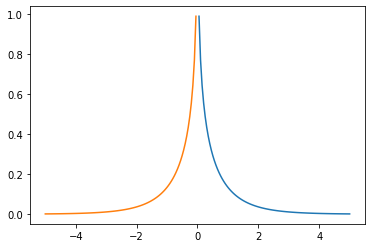

In [251]:
x = np.linspace(0, 5, 100)
# plt.plot(x, norm.pdf(x, loc = 0, scale = 1), label = r"$\chi_1^2 - 2$")
plt.plot(x,  kv(0, x) / 3.14)
plt.plot(-x,  kv(0, x) / 3.14)

In [70]:
a_T = ((T - (a ** 2 * (1 - a ** (2 * T)) / (1 - a ** 2))) / (1 - a ** 2)) / (T)
print(a_T)
print(1 / (1 - a ** 2))

5.041002715356926
5.263157894736843


In [44]:
a, T = 0.99, 101
X, noises = gen_ar(a, T)

print(sum(X[:-1] ** 2))
print((T - 1 - (a ** 2 * (1 - a ** (2 * (T - 1))) / (1 - a ** 2))) / (1 - a ** 2))
print((T - 1) / (1 - a ** 2))

10580.288943268897
2881.7794483176885
5025.125628140696


In [719]:
cv_0 = list(cv_0)
cv_1 = list(cv_1)

In [667]:
cv_diff = np.array(cv_0) - np.array(cv_1)
print(len(cv_diff[cv_diff < 0]) / len(cv_diff))

print(np.cov(np.array(cv_0)))
print(np.corrcoef(cv_0, cv_1))

0.8373
0.00039659406661403493
[[1.         0.99989332]
 [0.99989332 1.        ]]


In [687]:
print(1 / (T - 1))

0.02


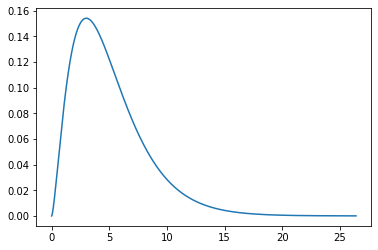

In [38]:
from scipy.stats import chi2

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, max(results), 0.001)

#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=T - 1))

\begin{align*}
 CV(a = \hat{a}) 
 &= \sum_{k = 1}^{T - 1} \left(X_{k+1} - \hat{a}^{-k}X_k\right)^2 \\
 &= \sum_{k = 1}^{T - 1}\left(X_{k+1} - \frac{\sum_{t = 1}^{T - 1} X_t X_{t + 1} - X_k X_{k + 1}}{\sum_{t = 1}^{T - 1} X_t^2 - X_k^2} X_k\right)^2 \\
 &= \sum_{k = 1}^{T - 1}\left(X_{k+1} - \left(a + \frac{\sum_{t = 1}^{T - 1} X_t \varepsilon_{t + 1} - X_k \varepsilon_{k + 1}}{\sum_{t = 1}^{T - 1} X_t^2 - X_k^2}\right) X_k\right)^2 \\
 &= \sum_{k = 1}^{T - 1}\left(\varepsilon_{k+1} - \frac{\sum_{t = 1}^{T - 1} X_t \varepsilon_{t + 1} - X_k \varepsilon_{k + 1}}{\sum_{t = 1}^{T - 1} X_t^2 - X_k^2} X_k\right)^2
\end{align*}

For $a = 0$, the bottom of fraction is chi squared distributed with $T - 2$ degrees of freedom.

Unfortunately, the top of the fraction is a product of two iid standard normal random variables, which is equal to $\pi$ times a Modified Bessel Function of the Second Kind distribution.

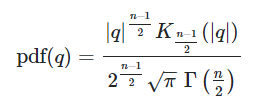

However, this is not correct as the sum of the squared standard normals are dependent.

In [757]:
a, T = 0.9, 100
X, noises = gen_ar(a, T)
a_est = (np.dot(X[:-1], X[1:]) - X[1:] * X[:-1]) / (np.dot(X[:-1], X[:-1]) - X[:-1] * X[:-1])
a_est_2 = a + (np.dot(X[:-1], noises[1:]) - noises[1:] * X[:-1]) / (np.dot(X[:-1], X[:-1]) - X[:-1] * X[:-1])

print(np.linalg.norm(X[1:] - a_est * X[:-1]) ** 2)
print(np.linalg.norm(X[1:] - a_est_2 * X[:-1]) ** 2)
print(np.linalg.norm(noises[1:] - (a_est - a) * X[:-1]) ** 2)
print(np.linalg.norm(noises[1:] - (np.dot(X[:-1], noises[1:]) - noises[1:] * X[:-1]) / (np.dot(X[:-1], X[:-1]) - X[:-1] * X[:-1]) * X[:-1]) ** 2)

136.4286074299501
136.42860742995006
136.42860742995006
136.42860742995006


$$\begin{align*} P(CV(a = 0) < CV(a = \hat{a}) 
&= P\left(\sum_{t = 1}^{T - 1}\varepsilon_{t + 1}^2 < \sum_{t = 1}^{T - 1} \left(\varepsilon_{t + 1} - \hat{a}^{-t} \varepsilon_t\right)^2\right) \\
&= P\left(\sum_{t = 1}^{T - 1}\varepsilon_{t + 1}^2 < \sum_{t = 1}^{T - 1} \left(\varepsilon_{t + 1}^2 - 2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} + \hat{a}^2 \varepsilon_t^2\right)\right) \\
&= P\left(0 < \sum_{t = 1}^{T - 1} \left( - 2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} + \hat{a}^2 \varepsilon_t^2\right)\right) \\
&= P\left(\sum_{t = 1}^{T - 1}2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} < \sum_{t = 1}^{T - 1} \hat{a}^2 \varepsilon_t^2\right) \\
&= P\left(\sum_{t = 1}^{T - 1}2\hat{a}^{-t} \varepsilon_t \varepsilon_{t + 1} - \hat{a}^2 \varepsilon_t^2< 0\right) \\
&= P\left(\sum_{t = 1}^{T - 1}\hat{a}^{-t} \varepsilon_t \left(2\varepsilon_{t + 1} - \hat{a} \varepsilon_t\right)< 0\right) \\
\end{align*}$$


## What we Know

$$\sqrt{T - 1}\left(\hat{a}_{T-1} - a_0\right) \overset{D}{\rightarrow} \mathcal{N}\left(0, \frac{1}{I^*(a)}\right),\qquad \text{where}\ I^*(a) \approx \frac{1}{1 - a^2}$$

\begin{align*}CV(0) &\sim \chi^2_{T-1} \overset{T \rightarrow \infty}{\rightarrow} \mathcal{N}\left(T - 1, 2 \left(T - 1\right)\right) \\
CV(1) &\overset{T \rightarrow \infty}{\rightarrow} \mathcal{N}\left(T - 1, 2 \left(T - 1\right)\right)\end{align*}

Now, the question is, what is their joint distribution?

It seems that $$\mathbf{E}\left[CV(0) - CV(1)\right] \approx \frac{1}{T - 1}.$$

$$\mathbf{V}\left[(T - 1) (CV(0) - CV(1))\right] \approx 2.$$

We have that
\begin{align*}
-I^*(a) 
&= \mathbb{E}_a\left[\frac{\partial^2}{\partial a^2} \log f_a(X)\right] \\
&= \mathbb{E}_a\left[\frac{\partial^2}{\partial a^2} \sum_{t = 2}^T-\frac{1}{2}\left(X_t - aX_{t-1}\right)^2\right]\\
&= \mathbb{E}_a\left[\frac{\partial}{\partial a} \sum_{t = 2}^T\left(X_t - aX_{t-1}\right)\cdot X_{t-1}\right] \\
&= -\mathbb{E}_a\left[\sum_{t = 2}^TX_{t-1}^2\right] \\
&= -\mathbb{E}_a\left[\sum_{t = 1}^{T - 1}X_{t}^2\right]
\end{align*}

Therefore, 
$$I^*(a) = \mathbb{E}_a\left[\sum_{t = 1}^{T - 1}X_{t}^2\right]$$

[1.0000031  1.00002294] [[3.99817995e-05 3.99807733e-05]
 [3.99807733e-05 3.99805517e-05]]
0.7575


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 1.000e+00, 1.200e+01,
        9.000e+00, 1.100e+01, 3.100e+01, 2.500e+01, 3.900e+01, 3.400e+01,
        6.700e+01, 5.900e+01, 8.800e+01, 8.700e+01, 1.120e+02, 1.480e+02,
        1.580e+02, 2.050e+02, 2.490e+02, 2.840e+02, 3.090e+02, 3.580e+02,
        4.100e+02, 4.610e+02, 5.710e+02, 6.210e+02, 6.980e+02, 7.860e+02,
        8.630e+02, 9.430e+02, 9.910e+02, 1.070e+03, 1.146e+03, 1.259e+03,
        1.297e+03, 1.366e+03, 1.420e+03, 1.494e+03, 1.519e+03, 1.599e+03,
        1.563e+03, 1.624e+03, 1.629e+03, 1.668e+03, 1.589e+03, 1.615e+03,
        1.490e+03, 1.451e+03, 1.465e+03, 1.439e+03, 1.306e+03, 1.188e+03,
        1.156e+03, 1.064e+03, 1.036e+03, 9.580e+02, 8.940e+02, 8.330e+02,
        6.820e+02, 6.380e+02, 5.770e+02, 4.850e+02, 4.170e+02, 4.140e+02,
        3.250e+02, 2.840e+02, 2.510e+02, 1.930e+02, 1.840e+02, 1.470e+02,
        1.180e+02, 8.800e+01, 9.700e+0

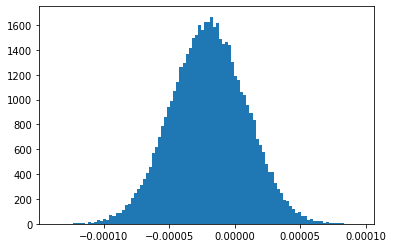

In [745]:
cv_0, cv_1 = np.array(cv_0), np.array(cv_1)
cor = np.corrcoef(cv_0, cv_1)[0][1]

means = np.array([cv_0.mean(), cv_1.mean()])
covs = np.cov(cv_0, cv_1)
print(means, covs)

cv_s = np.random.multivariate_normal(means, covs, 50000)
cv_d = cv_s[:, 0] - cv_s[:, 1]
print(sum(cv_d < 0) / len(cv_d))
plt.hist(cv_s[:, 0] - cv_s[:, 1], bins = 100)

In [735]:
print(np.linalg.det(covs))

-0.9999798716455567
